In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [247]:
df = pd.read_csv('ToyotaCorolla.csv', encoding='unicode_escape',)

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.tail()

In [180]:
df.shape

(1436, 34)

In [250]:
df = df.iloc[:500,2:]

In [251]:
df

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,11250,52,5,2000,58596,Petrol,110,1,Blue,0,1600,3,4,5,69,1045,0,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
496,11750,54,3,2000,58530,Petrol,110,0,Red,0,1600,5,4,5,85,1075,0,1,3,1,1,1,1,0,0,0,1,1,1,0,1,0,1,1,0,0
497,10950,55,2,2000,58377,Petrol,110,1,Black,0,1600,3,4,5,69,1050,1,1,3,0,1,0,1,0,0,0,1,1,1,0,1,1,1,1,0,0
498,11250,56,1,2000,58142,Petrol,110,1,Green,0,1600,5,4,5,85,1080,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [252]:
# FILTER COLUMNS 
filtered_linear_df=df.iloc[:,[0,4,5]] # METHOD 3 USING -iloc

In [253]:
filtered_linear_df.head()

,Price,KM,Fuel_Type
0,13500,46986,Diesel
1,13750,72937,Diesel
2,13950,41711,Diesel
3,14950,48000,Diesel
4,13750,38500,Diesel


In [254]:
# FILTER DATA FRAME 
linear_df=filtered_linear_df[(filtered_linear_df['KM']>1000) & (filtered_linear_df['Price']>10000)]
linear_df.count()

Price        428
KM           428
Fuel_Type    428
dtype: int64

In [255]:
linear_df

,Price,KM,Fuel_Type
0,13500,46986,Diesel
1,13750,72937,Diesel
2,13950,41711,Diesel
3,14950,48000,Diesel
4,13750,38500,Diesel
...,...,...,...
494,11950,58745,Petrol
495,11250,58596,Petrol
496,11750,58530,Petrol
497,10950,58377,Petrol


In [256]:
linear_df.sort_values('KM')

,Price,KM,Fuel_Type
111,31275,1500,Diesel
180,18500,2000,Petrol
179,22500,3000,Petrol
110,31000,4000,Diesel
178,21950,5000,Petrol
...,...,...,...
194,13250,123425,Diesel
193,11750,130062,Diesel
386,10250,143513,Diesel
190,11950,161000,Diesel


In [289]:
linear_df = linear_df.iloc[:, :-1]


In [290]:
X = linear_df.iloc[:, 0:1].values
y = linear_df.iloc[:, 1].values

In [ ]:
X

In [ ]:
y

In [291]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [280]:
len(X_train)

299

In [281]:
len(y_train)

299

In [223]:
len(X_test)

181

In [262]:
len(y_test)

129

In [292]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [293]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
X_test

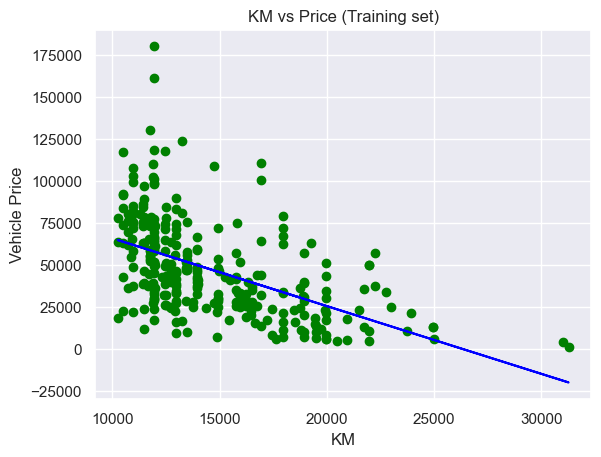

In [294]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('KM vs Price (Training set)')
plt.xlabel('KM')
plt.ylabel('Vehicle Price')
plt.show()

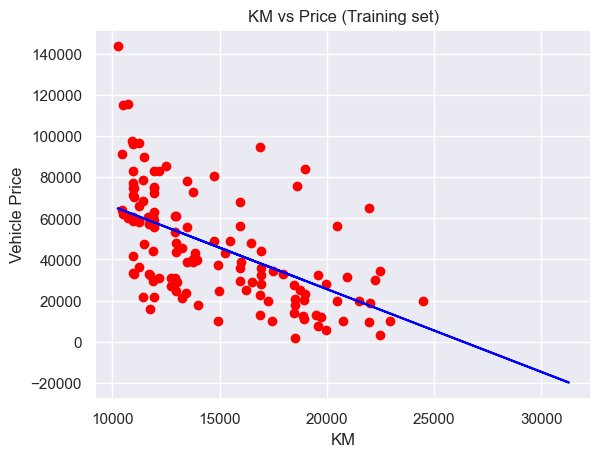

In [277]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('KM vs Price (Training set)')
plt.xlabel('KM')
plt.ylabel('Vehicle Price')
plt.show()

In [269]:
regressor.predict(np.array([[17500]]))

array([35633.99536863])

In [270]:
accuracy = regressor.score(X_test,y_test)
r2_score(y_test,y_pred)

0.3374366198899984

In [271]:
print(accuracy*100,'%')

33.74366198899984 %


In [239]:
X_test1=np.array([[25000],[50000]])

In [240]:
X_test1

array([[25000],
       [50000]])

In [241]:
y_pred1 = regressor.predict(X_test1)

In [242]:
y_pred1

array([  7351.31082685, -81808.95399092])

In [236]:
linear_df

,Price,KM,Fuel_Type
0,13500,46986,Diesel
1,13750,72937,Diesel
2,13950,41711,Diesel
3,14950,48000,Diesel
4,13750,38500,Diesel
...,...,...,...
1042,10950,15535,Petrol
1058,10500,172980,Diesel
1383,10950,53133,Petrol
1402,10500,47400,Petrol
